<a href="https://colab.research.google.com/github/liliya2022/Ames-Housing-Machine-Learning/blob/main/ML_Project_Iowa_Demographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Iowa Demographics - Part 4**

*By Liliya Lopez*

<img src='https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png'/>

## **1.Introduction**

#####**Libraries used**

In [54]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#####**Import dataset**

In [55]:
from google.colab import drive

In [56]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#https://data.iowa.gov/Government-Employees/State-of-Iowa-Salary-Book/s3p7-wy6w
salary = pd.read_csv('drive/MyDrive/Colab Notebooks/State_of_Iowa_Salary_Book.csv', index_col=0)
pd.set_option('display.max_columns', 20)
salary.head()

,Department,Agency/Institution,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid,Travel & Subsistence
Fiscal Year,,,,,,,,,,
2019,"Administrative Services, Department of",NaN,"ADAMS, BRANDON D",M,MARION,ELECTRICIAN,"2,594.40 BW",Jul 2019,68724.22,0.00
2019,"Administrative Services, Department of",NaN,"ADAMS, CAROL L",F,MITCHELL,HR PROFESSIONAL 2,"3,513.60 BW",Jul 2019,89447.20,239.00
2019,"Administrative Services, Department of",NaN,"ADAMS, JEANNIE R",F,POLK,PUBLIC SERVICE SUPERVISOR,"3,045.60 BW",Jul 2019,23475.20,0.00
2019,"Administrative Services, Department of",NaN,"AINGER, STEVEN J",M,DALLAS,HR PROGRAM COORD,"3,377.60 BW",Jul 2019,84764.00,1205.93
2019,"Administrative Services, Department of",NaN,"ANSTEY, LYNN M",F,POLK,ACCOUNTING TECHNICIAN 2,"2,048.80 BW",Jul 2019,52146.40,0.00


In [58]:
salary.shape

(913362, 10)

In [59]:
salary.columns

Index(['Department', 'Agency/Institution', 'Name', 'Gender',
       'Place of Residence', 'Position', 'Base Salary', 'Base Salary Date',
       'Total Salary Paid', 'Travel & Subsistence'],
      dtype='object')

In [60]:
salary_story = salary.loc[salary['Place of Residence'] == 'Story']
salary_story.reset_index(inplace=True)
salary_story.head()

,Fiscal Year,Department,Agency/Institution,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid,Travel & Subsistence
0,2020,"Transportation, Department of",NaN,"Aaron, Derrick L",M,Story,Custodial Worker,"1,500.80 BW",Jul 2020,41155.32,0.00
1,2020,"Transportation, Department of",NaN,"Abbott, Jared C",M,Story,Highway Technician Senior,"2,445.60 BW",Jul 2020,65239.40,100.00
2,2020,"Transportation, Department of",NaN,"Abdullah, Wasama",F,Story,Administrative Intern,17.31 HR,Jul 2020,4212.08,0.00
3,2020,"Transportation, Department of",NaN,"Abrams, Eric J",M,Story,Information Technology Specialist 5,TERMINATED,Jul 2020,83757.28,2118.79
4,2020,"Transportation, Department of",NaN,"Abrams, Zachary K",M,Story,Transportation Engineer Specialist,"3,658.40 BW",Jul 2020,92153.86,109.15


In [100]:
salary_story.Department.value_counts()

Iowa State University            4102
Transportation, Department of     432
Name: Department, dtype: int64

In [61]:
salary_story = salary_story.loc[salary_story['Fiscal Year'] == 2020]

In [62]:
salary_story = salary_story.drop(['Agency/Institution', 'Travel & Subsistence'], axis =1)

In [63]:
salary_story['Total Salary Paid'].min()

1000.49

In [64]:
salary_story['Total Salary Paid'].max()

2375000.04

In [65]:
salary_story.loc[salary_story['Total Salary Paid'] == 1000.49]

,Fiscal Year,Department,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid
2036,2020,Iowa State University,"Coppola, Abigail Kathleen",*,Story,Student Proctor,8.50 HR,Jul 2020,1000.49


In [66]:
salary_story.loc[salary_story['Total Salary Paid'] == 2375000.04]

,Fiscal Year,Department,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid
6798,2020,Iowa State University,"Prohm, Steven Marshall",M,Story,Head Coach,"337,500.00",Jul 2020,2375000.04


In [67]:
salary_story.columns

Index(['Fiscal Year', 'Department', 'Name', 'Gender', 'Place of Residence',
       'Position', 'Base Salary', 'Base Salary Date', 'Total Salary Paid'],
      dtype='object')

In [68]:
salary_story['Monthly Payment'] = (salary_story['Total Salary Paid']/12)*0.28 
salary_story['Loan Amount'] = round(salary_story['Monthly Payment']*166.79161439233403)
salary_story['Home Price'] = (salary_story['Loan Amount']*0.1)/0.08

salary_story.head()

,Fiscal Year,Department,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid,Monthly Payment,Loan Amount,Home Price
0,2020,"Transportation, Department of","Aaron, Derrick L",M,Story,Custodial Worker,"1,500.80 BW",Jul 2020,41155.32,960.290800,160168.0,200210.00
1,2020,"Transportation, Department of","Abbott, Jared C",M,Story,Highway Technician Senior,"2,445.60 BW",Jul 2020,65239.40,1522.252667,253899.0,317373.75
2,2020,"Transportation, Department of","Abdullah, Wasama",F,Story,Administrative Intern,17.31 HR,Jul 2020,4212.08,98.281867,16393.0,20491.25
3,2020,"Transportation, Department of","Abrams, Eric J",M,Story,Information Technology Specialist 5,TERMINATED,Jul 2020,83757.28,1954.336533,325967.0,407458.75
4,2020,"Transportation, Department of","Abrams, Zachary K",M,Story,Transportation Engineer Specialist,"3,658.40 BW",Jul 2020,92153.86,2150.256733,358645.0,448306.25


In [69]:
salary_story = salary_story.loc[salary_story['Total Salary Paid'] != 2375000.04]

In [70]:
salary_story['Total Salary Paid'].max()

2350500.02

In [71]:
salary_story = salary_story.loc[salary_story['Total Salary Paid'] != 2350500.02]

In [72]:
salary_story['Total Salary Paid'].max()

917499.98

In [73]:
salary_story.loc[salary_story['Total Salary Paid'] == 917499.98]

,Fiscal Year,Department,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid,Monthly Payment,Loan Amount,Home Price
3672,2020,Iowa State University,"Heacock, Jon Robert",M,Story,Assistant Coach,"810,000.00",Jul 2020,917499.98,21408.332867,3570730.0,4463412.5


In [74]:
salary_story = salary_story.loc[salary_story['Total Salary Paid'] >= 35000]

In [75]:
salary_story.nsmallest(10, ['Total Salary Paid'])

,Fiscal Year,Department,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid,Monthly Payment,Loan Amount,Home Price
3526,2020,Iowa State University,"Hansel, Craig",M,Story,Assistant Professor of Practice,"35,000.00",Jul 2020,35000.01,816.666900,136213.0,170266.25
4200,2020,Iowa State University,"Joens, Chantel Dee",F,Story,Supervisor - Custodian Services,"35,464.32",Jul 2020,35008.01,816.853567,136244.0,170305.00
1693,2020,Iowa State University,"Carter, Deshauna L",F,Story,Graduate Assistant-Administrative,0.00,Jul 2020,35047.08,817.765200,136396.0,170495.00
654,2020,Iowa State University,"Alexander, Shawn M",M,Story,Cook I,18.49 HR,Jul 2020,35071.28,818.329867,136491.0,170613.75
4357,2020,Iowa State University,"Kallmyer, Nathaniel E",M,Story,CBE Graduate RA,0.00,Jul 2020,35077.66,818.478733,136515.0,170643.75
2357,2020,Iowa State University,"Dickerson, Adrienne",F,Story,Customer Relations Specialist I,"36,579.00",Jul 2020,35103.67,819.085633,136617.0,170771.25
6509,2020,Iowa State University,"Patterson, Mary Elizabeth",F,Story,Program Assistant I,"35,861.00",Jul 2020,35231.71,822.073233,137115.0,171393.75
4597,2020,Iowa State University,"King, Emma Irene",F,Story,Parking and Transportation Field Service Offic...,16.19 HR,Jul 2020,35236.31,822.180567,137133.0,171416.25
1215,2020,Iowa State University,"Bierbaum, Lora Nicole",F,Story,Program Coordinator I,"36,750.00",Jul 2020,35270.33,822.974367,137265.0,171581.25
6733,2020,Iowa State University,"Poorman, Kyle Alexander Waddell",M,Story,Program Assistant II,"50,000.00",Jul 2020,35272.47,823.024300,137274.0,171592.50


In [76]:
salary_story.nlargest(10, ['Total Salary Paid'])

,Fiscal Year,Department,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid,Monthly Payment,Loan Amount,Home Price
3672,2020,Iowa State University,"Heacock, Jon Robert",M,Story,Assistant Coach,"810,000.00",Jul 2020,917499.98,21408.332867,3570730.0,4463412.50
5403,2020,Iowa State University,"Manning, Thomas Anthony",M,Story,Assistant Coach,"810,000.00",Jul 2020,807500.02,18841.667133,3142632.0,3928290.00
2754,2020,Iowa State University,"Fennelly, William Michael",M,Story,Head Coach,"270,000.00",Jul 2020,750000.00,17500.000000,2918853.0,3648566.25
6724,2020,Iowa State University,"Pollard, Jamie B",M,Story,Dir Intercol Athletics,"654,696.00",Jul 2020,725000.04,16916.667600,2821558.0,3526947.50
9160,2020,Iowa State University,"Wintersteen, Wendy",F,Story,President,"589,999.00",Jul 2020,594666.80,13875.558667,2314327.0,2892908.75
8007,2020,Iowa State University,"Spalding, David Peter",M,Story,Dean,"463,589.00",Jul 2020,462453.87,10790.590300,1799780.0,2249725.00
4386,2020,Iowa State University,"Kanthasamy, Anumantha G",M,Story,Distinguished Professor,"283,758.00",Jul 2020,439617.08,10257.731867,1710904.0,2138630.00
3238,2020,Iowa State University,"Gordon, Joel E",M,Story,Assistant Coach,"360,000.00",Jul 2020,419999.96,9799.999067,1634558.0,2043197.50
5580,2020,Iowa State University,"McDonald, Darrell Keith",M,Story,Assistant Coach,"360,000.00",Jul 2020,419999.96,9799.999067,1634558.0,2043197.50
8693,2020,Iowa State University,"Veidt, Richard Tyson",M,Story,Assistant Coach,"360,000.00",Jul 2020,419999.96,9799.999067,1634558.0,2043197.50


## **2.Clustering**

#####**Salary Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


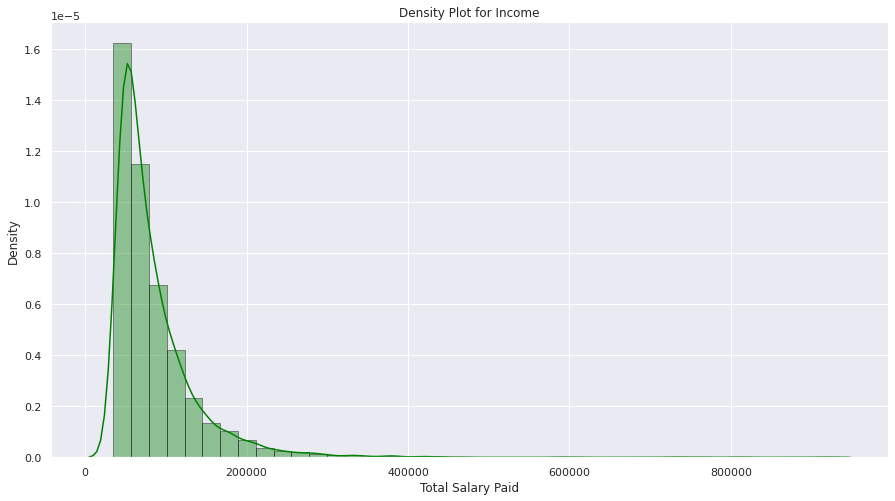

In [77]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(a=salary_story['Total Salary Paid'], bins = 40, color='green',
             hist_kws={"edgecolor": 'black'}).set(title = "Density Plot for Income")
plt.show()

#####**Correlation matrix**

#####**Clustering**

[Text(0.5, 1.0, 'Income per Home Price')]

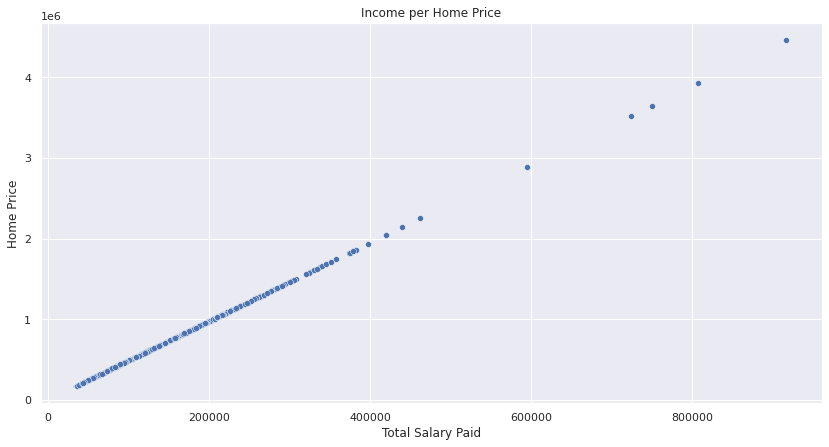

In [78]:
sns.set(rc = {'figure.figsize':(14,7)})
sns.scatterplot(data = salary_story, x = 'Total Salary Paid',  y = 'Home Price').set(title = "Income per Home Price")

In [79]:
salary_story['Total Salary Paid'].isnull().sum(axis=0)

0

In [80]:
km = KMeans(n_clusters = 5)
km

KMeans(n_clusters=5)

In [81]:
y_predicted = km.fit_predict(salary_story[['Total Salary Paid', 'Home Price']])
y_predicted

array([0, 0, 2, ..., 0, 1, 0], dtype=int32)

In [82]:
salary_story['Cluster'] = y_predicted
salary_story.head()

,Fiscal Year,Department,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid,Monthly Payment,Loan Amount,Home Price,Cluster
0,2020,"Transportation, Department of","Aaron, Derrick L",M,Story,Custodial Worker,"1,500.80 BW",Jul 2020,41155.32,960.290800,160168.0,200210.00,0
1,2020,"Transportation, Department of","Abbott, Jared C",M,Story,Highway Technician Senior,"2,445.60 BW",Jul 2020,65239.40,1522.252667,253899.0,317373.75,0
3,2020,"Transportation, Department of","Abrams, Eric J",M,Story,Information Technology Specialist 5,TERMINATED,Jul 2020,83757.28,1954.336533,325967.0,407458.75,2
4,2020,"Transportation, Department of","Abrams, Zachary K",M,Story,Transportation Engineer Specialist,"3,658.40 BW",Jul 2020,92153.86,2150.256733,358645.0,448306.25,2
5,2020,"Transportation, Department of","Abu-hawash, Ahmad",M,Story,Senior Transportation Engineer,"4,497.60 BW",Jul 2020,116727.20,2723.634667,454279.0,567848.75,2


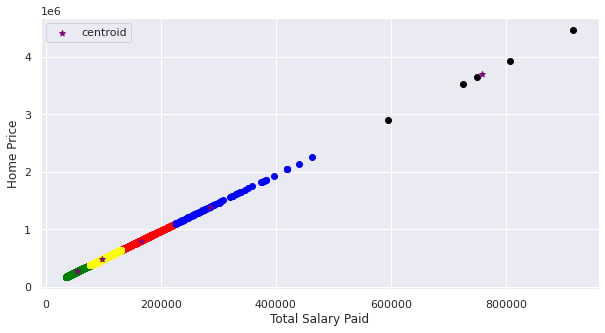

In [83]:
plt.figure(figsize = (10,5))

df1 = salary_story[salary_story.Cluster == 0]
df2 = salary_story[salary_story.Cluster == 1]
df3 = salary_story[salary_story.Cluster == 2]
df4 = salary_story[salary_story.Cluster == 3]
df5 = salary_story[salary_story.Cluster == 4]

plt.scatter(df1['Total Salary Paid'], df1['Home Price'], color = 'green')
plt.scatter(df2['Total Salary Paid'], df2['Home Price'], color = 'red')
plt.scatter(df3['Total Salary Paid'], df3['Home Price'], color = 'yellow')
plt.scatter(df4['Total Salary Paid'], df4['Home Price'], color='blue')
plt.scatter(df5['Total Salary Paid'], df5['Home Price'], color='black')


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

plt.xlabel('Total Salary Paid')
plt.ylabel('Home Price')
plt.legend()

In [84]:
print(df1['Total Salary Paid'].min()) #green income range from 35832 - 97006
print(df1['Total Salary Paid'].max())
print(df1['Home Price'].min()) #green home price range from 174313.75 - 471910.0
print(df1['Home Price'].max())

35000.01
76014.87
170266.25
369793.75


In [85]:
print(df2['Total Salary Paid'].min()) #red income range from 35832 - 97006
print(df2['Total Salary Paid'].max())
print(df2['Home Price'].min()) #red home price range from 174313.75 - 471910.0
print(df2['Home Price'].max())

131576.79
224442.37
640088.7500000001
1091857.5


In [86]:
print(df3['Total Salary Paid'].min()) #yellow income range from 189896 - 309364
print(df3['Total Salary Paid'].max())
print(df3['Home Price'].min()) #yellow income range from 923797.5 - 1504980.0
print(df3['Home Price'].max())

76108.69
131095.15
370250.0
637746.25


In [87]:
print(df4['Total Salary Paid'].min()) #blue income range from 189896 - 309364
print(df4['Total Salary Paid'].max())
print(df4['Home Price'].min()) #blue income range from 923797.5 - 1504980.0
print(df4['Home Price'].max())

225587.79
462453.87
1097430.0
2249725.0


In [88]:
print(df5['Total Salary Paid'].min()) #black income range from 189896 - 309364
print(df5['Total Salary Paid'].max())
print(df5['Home Price'].min()) #black income range from 923797.5 - 1504980.0
print(df5['Home Price'].max())

594666.8
917499.98
2892908.75
4463412.5


In [89]:
salary_reshape = salary_story['Total Salary Paid'].values.reshape(-1,1)
home_pr_reshape = salary_story['Home Price'].values.reshape(-1,1)

In [90]:
scaler = MinMaxScaler()
scaler.fit(salary_reshape)
salary_story['Total Salary Paid Rescaled'] = scaler.transform(salary_reshape)

scaler.fit(home_pr_reshape)
salary_story['Home Price Rescaled'] = scaler.transform(salary_reshape)
salary_story.head()

,Fiscal Year,Department,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid,Monthly Payment,Loan Amount,Home Price,Cluster,Total Salary Paid Rescaled,Home Price Rescaled
0,2020,"Transportation, Department of","Aaron, Derrick L",M,Story,Custodial Worker,"1,500.80 BW",Jul 2020,41155.32,960.290800,160168.0,200210.00,0,0.006975,-0.030074
1,2020,"Transportation, Department of","Abbott, Jared C",M,Story,Highway Technician Senior,"2,445.60 BW",Jul 2020,65239.40,1522.252667,253899.0,317373.75,0,0.034266,-0.024464
3,2020,"Transportation, Department of","Abrams, Eric J",M,Story,Information Technology Specialist 5,TERMINATED,Jul 2020,83757.28,1954.336533,325967.0,407458.75,2,0.055249,-0.020150
4,2020,"Transportation, Department of","Abrams, Zachary K",M,Story,Transportation Engineer Specialist,"3,658.40 BW",Jul 2020,92153.86,2150.256733,358645.0,448306.25,2,0.064764,-0.018195
5,2020,"Transportation, Department of","Abu-hawash, Ahmad",M,Story,Senior Transportation Engineer,"4,497.60 BW",Jul 2020,116727.20,2723.634667,454279.0,567848.75,2,0.092609,-0.012471


In [91]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(salary_story[['Total Salary Paid Rescaled', 'Home Price Rescaled']])
y_predicted

array([0, 0, 2, ..., 0, 4, 0], dtype=int32)

In [92]:
salary_story['Cluster'] = y_predicted
salary_story.head()

,Fiscal Year,Department,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid,Monthly Payment,Loan Amount,Home Price,Cluster,Total Salary Paid Rescaled,Home Price Rescaled
0,2020,"Transportation, Department of","Aaron, Derrick L",M,Story,Custodial Worker,"1,500.80 BW",Jul 2020,41155.32,960.290800,160168.0,200210.00,0,0.006975,-0.030074
1,2020,"Transportation, Department of","Abbott, Jared C",M,Story,Highway Technician Senior,"2,445.60 BW",Jul 2020,65239.40,1522.252667,253899.0,317373.75,0,0.034266,-0.024464
3,2020,"Transportation, Department of","Abrams, Eric J",M,Story,Information Technology Specialist 5,TERMINATED,Jul 2020,83757.28,1954.336533,325967.0,407458.75,2,0.055249,-0.020150
4,2020,"Transportation, Department of","Abrams, Zachary K",M,Story,Transportation Engineer Specialist,"3,658.40 BW",Jul 2020,92153.86,2150.256733,358645.0,448306.25,2,0.064764,-0.018195
5,2020,"Transportation, Department of","Abu-hawash, Ahmad",M,Story,Senior Transportation Engineer,"4,497.60 BW",Jul 2020,116727.20,2723.634667,454279.0,567848.75,2,0.092609,-0.012471


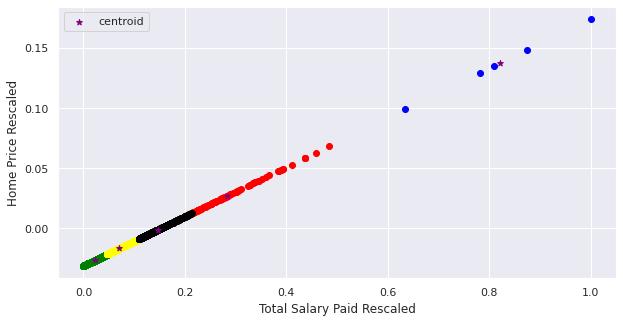

In [93]:
plt.figure(figsize = (10,5))

df1 = salary_story[salary_story.Cluster == 0]
df2 = salary_story[salary_story.Cluster == 1]
df3 = salary_story[salary_story.Cluster == 2]
df4 = salary_story[salary_story.Cluster == 3]
df5 = salary_story[salary_story.Cluster == 4]

plt.scatter(df1['Total Salary Paid Rescaled'], df1['Home Price Rescaled'], color = 'green')
plt.scatter(df2['Total Salary Paid Rescaled'], df2['Home Price Rescaled'], color = 'red')
plt.scatter(df3['Total Salary Paid Rescaled'], df3['Home Price Rescaled'], color = 'yellow')
plt.scatter(df4['Total Salary Paid Rescaled'], df4['Home Price Rescaled'], color='blue')
plt.scatter(df5['Total Salary Paid Rescaled'], df5['Home Price Rescaled'], color='black')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

plt.xlabel('Total Salary Paid Rescaled')
plt.ylabel('Home Price Rescaled')
plt.legend()

In [94]:
k_rng = range(1,10)
sse =[]
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(salary_story[['Total Salary Paid Rescaled', 'Home Price Rescaled']])
  sse.append(km.inertia_)


In [95]:
sse

[17.576169769250974,
 7.6428205068971735,
 4.497771007015089,
 2.76991082864048,
 1.6729386392910262,
 1.1188464755151402,
 0.83146205451827,
 0.6349802563006592,
 0.4898791296943201]

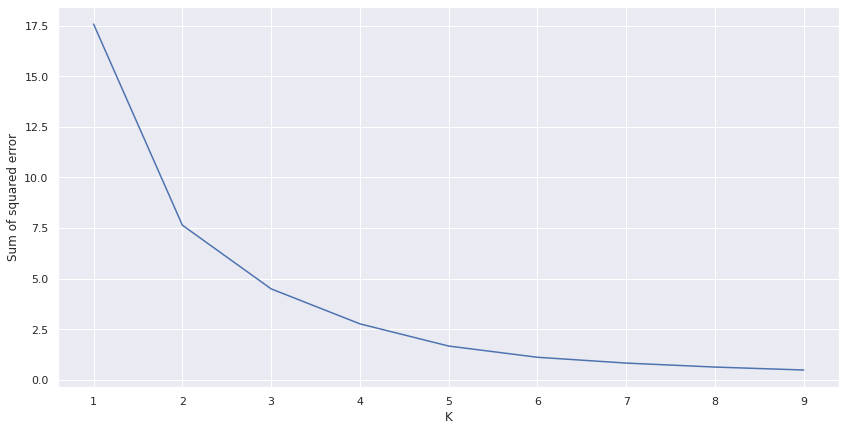

In [96]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)